# Data analysis: air pollutant concentration

In this notebook, we will analyse time series data on pollutant concentration.

## Dataset

We will work with the Air Quality Dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

For instructions on how to download, prepare, and store the dataset, refer to notebook number 3, in the folder "01-Datasets" from this repository.


## Data set synopsis

We will work with the variable **relative humidity (RH)** and **CO concentration (CO_sensor)**.

Both are time series. 

This dataset is particularly challenging because **timestamps are not equidistant**. Entire days of recordings are missing, probably due to data collection failure. There are also outliers wherever the sensors did not manage to obtain a measurement of humidity or CO concentration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
# If you followed the instructions, the data should be
# located here:

filename = "../Datasets/AirQualityUCI_ready.csv"

# The variables we will use in this demo:
variables = ["Date_Time", "CO_sensor", "RH"]

# Load data:
data = pd.read_csv(filename, usecols=variables, index_col=["Date_Time"])

data.head()

,CO_sensor,RH
Date_Time,,
2004-10-03 18:00:00,1360.0,48.9
2004-10-03 19:00:00,1292.0,47.7
2004-10-03 20:00:00,1402.0,54.0
2004-10-03 21:00:00,1376.0,60.0
2004-10-03 22:00:00,1272.0,59.6


- timestamp in the index. 

- CO_sensor: carbon monoxide concentration.

- RH: relative humidity (in the air).

In [3]:
# Cast datetime variable in datetime format.

data.index = pd.to_datetime(data.index)

data.index

DatetimeIndex(['2004-10-03 18:00:00', '2004-10-03 19:00:00',
               '2004-10-03 20:00:00', '2004-10-03 21:00:00',
               '2004-10-03 22:00:00', '2004-10-03 23:00:00',
               '2004-11-03 00:00:00', '2004-11-03 01:00:00',
               '2004-11-03 02:00:00', '2004-11-03 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=9357, freq=None)

In [4]:
# Reduce data span (poor data quality outside these dates)

data = data.loc["2004-04-04":"2005-04-04"]

In [5]:
# Sanity check: data span.

data.index.min(), data.index.max()

(Timestamp('2004-04-04 00:00:00'), Timestamp('2005-04-04 14:00:00'))

In [6]:
# Quick check: missing data.

data.isnull().sum()

CO_sensor    0
RH           0
dtype: int64

At first sight, there is no data missing.

## Quick analysis - plot time series

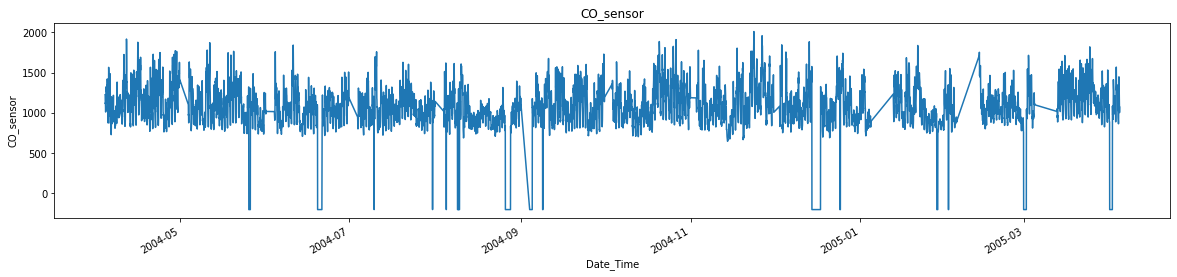

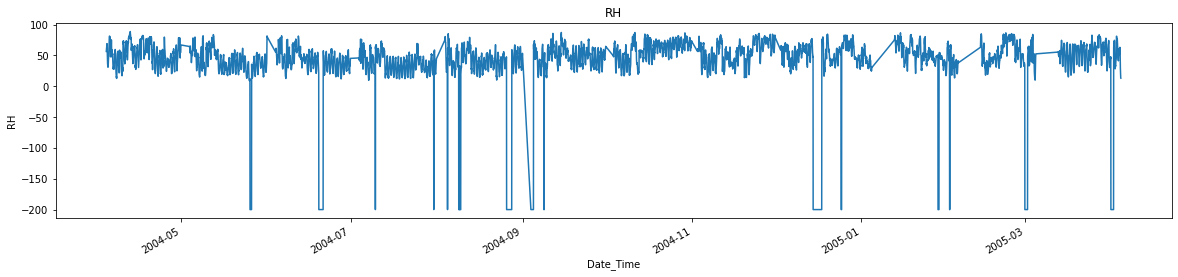

In [7]:
# Plot the time series.

for var in ["CO_sensor", "RH"]:

    # Plot the time series
    data[var].plot(figsize=(20, 4))

    # Add title
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

Looking at the plots, we see the following:

- There are records missing: pandas plot interpolates linearly between available values.

- Some values are negative, most likely measurement errors, as concentration or humidity level can't be negative.

## Highlight missing timestamps

To highlight the missing timestamps, I will first introduce the missing timestamps in the dataset. This will introduce NaN into the variables.

Then I will fill in the NAN, carrying the last value forward. And finally, I will plot the imputed data to highlight the missing timestamps.

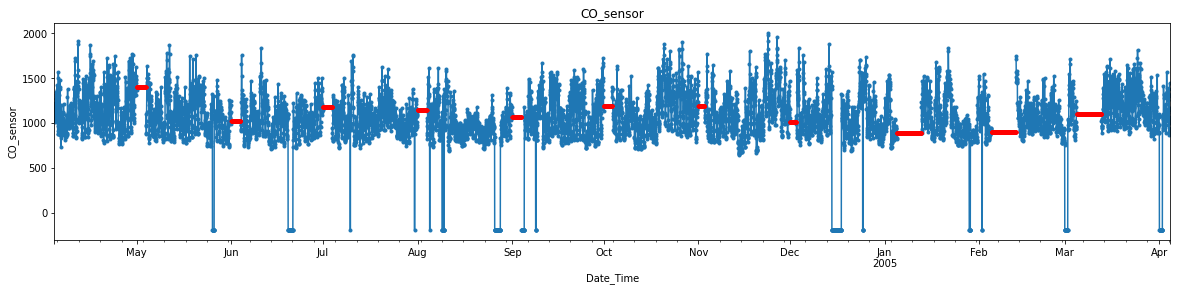

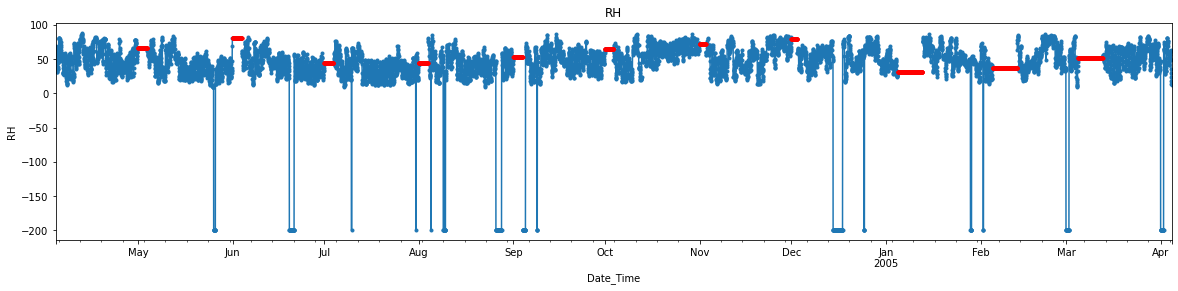

In [8]:
# Introduce the missing timestamps.
# Note that we capture this in a different dataframe.
data_ = data.asfreq("1H")

# Apply the forward fill method.
data_imputed = data_.fillna(method="ffill")

# Plot the imputed time series.
for var in ["CO_sensor", "RH"]:

    # plot the time series.
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[20, 4])

    # plot the imputed values on top, in red.
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")

    # Add title.
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

## Seasonality

Air pollutant concentration changes with car traffic. At rush hour, we have more pollutants. During the night hours, we have fewer pollutants.

Let's see if what I am saying is true.

In [9]:
# Capture "time" in a new variable.

time_ = data.index.time

time_ = pd.Series(time_, index=data.index)

time_.head()

Date_Time
2004-10-03 18:00:00    18:00:00
2004-10-03 19:00:00    19:00:00
2004-10-03 20:00:00    20:00:00
2004-10-03 21:00:00    21:00:00
2004-10-03 22:00:00    22:00:00
dtype: object

Text(0, 0.5, 'Concentration')

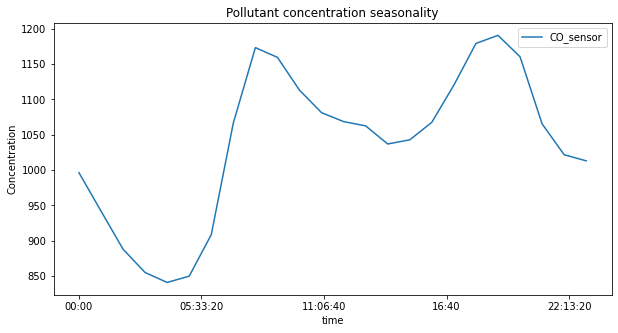

In [10]:
# Plot the average pollutant concentration per hour.

data.groupby(time_)[["CO_sensor"]].mean().plot(figsize=(10, 5))
plt.title("Pollutant concentration seasonality")
plt.ylabel("Concentration")

Text(0, 0.5, 'Concentration')

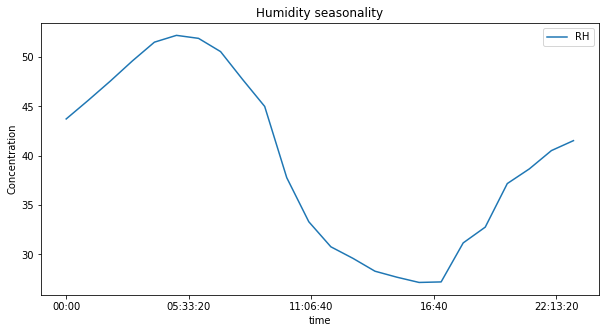

In [11]:
# Plot the average humidity per hour.

data.groupby(time_)[["RH"]].mean().plot(figsize=(10, 5))
plt.title("Humidity seasonality")
plt.ylabel("Concentration")

Bingo! More pollutants are detected around 8–9 a.m. and again at 18–19 hs.